## Ирисы.
Изучить данные файла ирисы.txt. Выполнить кластеризацию (выбрать оптимальный алгоритм и объяснить почему), построить необходимые визуализации для демонстрации работы алгоритма и итогов анализа.

In [97]:
# импортируем библиотеки 

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from pandas import DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [98]:
# загружаем файл с данными
iris_df = pd.read_csv('Iris.csv', header=0, sep =';', decimal=',', encoding=('cp1251'))

# выводим на просмотр первые строки 
iris_df.head()

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка,Класс
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
# смотрим описание

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Длина чашелистика     150 non-null float64
Ширина чашелистика    150 non-null float64
Длина лепестка        150 non-null float64
Ширина лепестка       150 non-null float64
Класс                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Видим, что набор данных состоит из длины и ширины двух типов лепестков Ириса - чашелистика и лепестка. 
Целевая переменная — это класс Ириса: Setosa, Versicolor, Virginica. 
Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и классом Ирисов.

In [100]:
# копируем первые четыре столбца в новую переменную (без переменной, определяющей класс ириса)

iris_df1 = pd.DataFrame(iris_df[['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка', 'Ширина лепестка']])
iris_df1.head()

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
# добавим в исходный набор новый столбец с номером кластера наблюдения

iris_df1['Кластер'] = model.fit_predict(iris_df1)
iris_df1.head()

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка,Кластер
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [103]:
# добавим в исходный набор новый столбец, преобразовав категориальную переменную в фактор

iris_df1['Класс'] = pd.factorize(iris_df['Класс']) [0]
iris_df1.head()

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка,Кластер,Класс
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


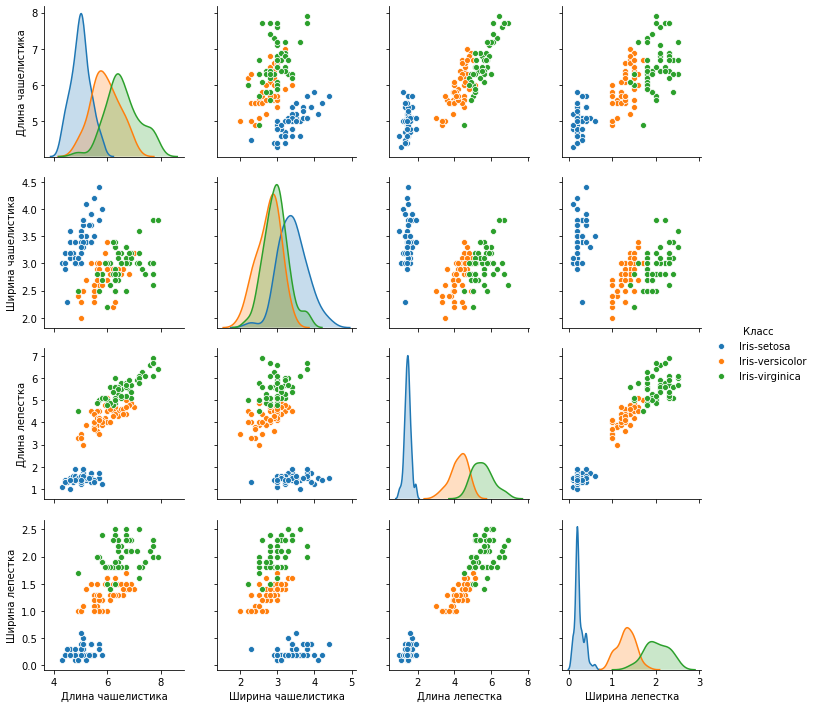

In [104]:
# cтроим таблицу с зависимостями между признаками и раскрашиваем точки в зависимости от класса Ирисов

import seaborn as sns
sns.pairplot(iris_df[['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка',
                         'Ширина лепестка', 'Класс']], hue = 'Класс')

Тут видно, что «Ширина лепестка» и «Длина лепестка» имеют сильную зависимость — точки вытянуты вдоль одной линии. По этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы компактно.

In [105]:
# теперь посмотрим на математические значения зависимостей

iris_df1[['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка', 'Ширина лепестка']].corr()

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка
Длина чашелистика,1.000000,-0.109369,0.871754,0.817954
Ширина чашелистика,-0.109369,1.000000,-0.420516,-0.356544
Длина лепестка,0.871754,-0.420516,1.000000,0.962757
Ширина лепестка,0.817954,-0.356544,0.962757,1.000000


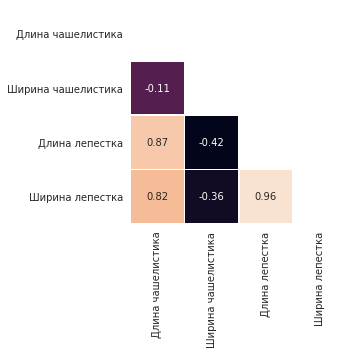

In [106]:
# построим тепловую карту зависимости признаков

import seaborn as sns

corr = iris_df1[['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка', 'Ширина лепестка']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)

Действительно видим, что между переменными «Ширина лепестка» и «Длина лепестка» выявлена очень сильная зависимость 0.96.

Разделяем данные на данные для обучения и тестовые данные. На тестовые данные отводим 30% от всей выборки (параметр test_size = 0.3):

In [107]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_df1[[
    'Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка', 
    'Ширина лепестка']], iris_df1['Класс'], test_size = 0.3)
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.81      1.00      0.90        13
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.95      0.93      0.93        45



Видим, что accuracy (доля правильных ответов модели), precision (точность) и recall (полнота) дали больше 0.9.